# Ejemplo de clase 9 pandas, lectura de html
## Autor : José Francisco Morales Milanes
### compartir con : ajmena92@gmail.com como comentarista

Podemos extraer información directamente desde tablas en paginas web a partir de la Url..
Libreria pandas
> pip install pandas en google colab ya tiene pandas

puede importar un monton de cosas que puede consultar csv, excel, bases de datos sql, Apis.
le da esteroides a las listas y diccionarios en python

siempre le damos imprimir para ver que es lo que hay en
https://gee.bccr.fi.cr/IndicadoresEconomicos/Cuadros/frmConsultaTCVentanilla.aspx

In [1]:
import pandas as pd
# importar datos del banco central
df = pd.read_html('https://gee.bccr.fi.cr/IndicadoresEconomicos/Cuadros/frmConsultaTCVentanilla.aspx',encoding="utf-8", decimal=",",thousands=".")
#ccodificacion utf-8 permite caracteres especiales en español
#decimales y miles

#obtener informacionn general del data frame
df = df[2].copy() # copia el indice 2 de la lista se itera como un data frame buscamos la tabla que nos interesa
df.info()
print("\n----------dimensiones de df detakkada---------")
print(df.shape)

df.head()
#print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8 non-null      object
 1   1       37 non-null     object
 2   2       37 non-null     object
 3   3       37 non-null     object
 4   4       37 non-null     object
 5   5       37 non-null     object
dtypes: object(6)
memory usage: 1.9+ KB

----------dimensiones de df detakkada---------
(38, 6)


,0,1,2,3,4,5
0,Tipo de Entidad,Entidad Autorizada,Compra,Venta,Diferencial Cambiario,Última Actualización
1,Bancos públicos,Banco de Costa Rica,498.00,512.00,14.00,18/02/2025 08:03 p.m.
2,NaN,Banco Nacional de Costa Rica,499.00,513.00,14.00,20/02/2025 01:03 p.m.
3,NaN,Banco Popular y de Desarrollo Comunal,499.00,513.00,14.00,20/02/2025 01:16 p.m.
4,Bancos privados,Banco BAC San José S.A.,500.00,514.00,14.00,20/02/2025 01:03 p.m.


#Limpiamos los datos del data frame para procesar los datos

In [3]:
# para rellenar nulos
# tail muestra las ultimas 5 finals
df[0].fillna('NO VALOR') #.tail()

,0
0,Tipo de Entidad
1,Bancos públicos
2,NO VALOR
3,NO VALOR
4,Bancos privados
5,NO VALOR
6,NO VALOR
7,NO VALOR
8,NO VALOR
9,NO VALOR


In [4]:
# ELIMINAR LOS NULOS
df.dropna() # elimina fila con datos nulaos que no tenia que eliminar permite visulizar los datos sin valores nulos

,0,1,2,3,4,5
0,Tipo de Entidad,Entidad Autorizada,Compra,Venta,Diferencial Cambiario,Última Actualización
1,Bancos públicos,Banco de Costa Rica,498.00,512.00,14.00,18/02/2025 08:03 p.m.
4,Bancos privados,Banco BAC San José S.A.,500.00,514.00,14.00,20/02/2025 01:03 p.m.
15,Financieras,Financiera Cafsa S.A.,498.00,514.00,16.00,20/02/2025 03:11 p.m.
18,Mutuales de Vivienda,Grupo Mutual Alajuela - La Vivienda de Ahorro ...,501.00,513.00,12.00,20/02/2025 01:57 p.m.
20,Cooperativas,Coope-ANDE N°1 R.L.,499.00,513.50,14.50,20/02/2025 10:04 a.m.
28,Casas de Cambio,Airpak Casa de Cambio,503.00,521.00,18.00,20/02/2025 02:50 p.m.
32,Puestos de Bolsa,"BCT Valores, Puesto De Bolsa, S.A.",496.00,514.00,18.00,20/02/2025 01:19 p.m.


In [ ]:
# df  reemplaza valores nulos NaN con el último valor en la columna
# inplace = True es para indicar al interprete que lo aplique al dataframe en memoria le da un mensaje de advertencia pero todo bien lo aplica en memoria
df[0].ffill(inplace=True) #para rellenar nulos

In [5]:
# extraer la primera fila para asignarla como encabezados de columna en el data frame
primera_fila = df.iloc[0] # indice location

#primera_fila
# indicar a pandas que la primera fila es el encabezado  de las columnas
df.columns = primera_fila
#df.head()
df.drop(0, inplace=True) # elimina la primera fila del dataframe
df.head()

,Tipo de Entidad,Entidad Autorizada,Compra,Venta,Diferencial Cambiario,Última Actualización
1,Bancos públicos,Banco de Costa Rica,498.00,512.00,14.00,18/02/2025 08:03 p.m.
2,NaN,Banco Nacional de Costa Rica,499.00,513.00,14.00,20/02/2025 01:03 p.m.
3,NaN,Banco Popular y de Desarrollo Comunal,499.00,513.00,14.00,20/02/2025 01:16 p.m.
4,Bancos privados,Banco BAC San José S.A.,500.00,514.00,14.00,20/02/2025 01:03 p.m.
5,NaN,Banco BCT S.A.,496.00,514.00,18.00,20/02/2025 01:08 p.m.


In [6]:
#Renombrar los nombres de las columnas
df.rename(columns = {
    'Tipo de Entidad': 'Tipo',
    'Entidad Autorizada': 'Entidad',
    'Diferencial Cambiario':'Diferencial'
}, inplace = True)
df.head()

,Tipo,Entidad,Compra,Venta,Diferencial,Última Actualización
1,Bancos públicos,Banco de Costa Rica,498.00,512.00,14.00,18/02/2025 08:03 p.m.
2,NaN,Banco Nacional de Costa Rica,499.00,513.00,14.00,20/02/2025 01:03 p.m.
3,NaN,Banco Popular y de Desarrollo Comunal,499.00,513.00,14.00,20/02/2025 01:16 p.m.
4,Bancos privados,Banco BAC San José S.A.,500.00,514.00,14.00,20/02/2025 01:03 p.m.
5,NaN,Banco BCT S.A.,496.00,514.00,18.00,20/02/2025 01:08 p.m.


#SELECCIONAR FILAS

In [7]:
df.dropna(inplace=True)

In [8]:
#Seleccionas filas por índice utilizando iloc
df.iloc[0:6]

,Tipo,Entidad,Compra,Venta,Diferencial,Última Actualización
1,Bancos públicos,Banco de Costa Rica,498.00,512.00,14.00,18/02/2025 08:03 p.m.
4,Bancos privados,Banco BAC San José S.A.,500.00,514.00,14.00,20/02/2025 01:03 p.m.
15,Financieras,Financiera Cafsa S.A.,498.00,514.00,16.00,20/02/2025 03:11 p.m.
18,Mutuales de Vivienda,Grupo Mutual Alajuela - La Vivienda de Ahorro ...,501.00,513.00,12.00,20/02/2025 01:57 p.m.
20,Cooperativas,Coope-ANDE N°1 R.L.,499.00,513.50,14.50,20/02/2025 10:04 a.m.
28,Casas de Cambio,Airpak Casa de Cambio,503.00,521.00,18.00,20/02/2025 02:50 p.m.


SELECCIONAR FILAS

In [9]:
#SELECCIONAR FILAS DEL DATA FRAME
df[0:5]

,Tipo,Entidad,Compra,Venta,Diferencial,Última Actualización
1,Bancos públicos,Banco de Costa Rica,498.00,512.00,14.00,18/02/2025 08:03 p.m.
4,Bancos privados,Banco BAC San José S.A.,500.00,514.00,14.00,20/02/2025 01:03 p.m.
15,Financieras,Financiera Cafsa S.A.,498.00,514.00,16.00,20/02/2025 03:11 p.m.
18,Mutuales de Vivienda,Grupo Mutual Alajuela - La Vivienda de Ahorro ...,501.00,513.00,12.00,20/02/2025 01:57 p.m.
20,Cooperativas,Coope-ANDE N°1 R.L.,499.00,513.50,14.50,20/02/2025 10:04 a.m.


In [10]:
# seleccionar filas directamente
df[0:5]

,Tipo,Entidad,Compra,Venta,Diferencial,Última Actualización
1,Bancos públicos,Banco de Costa Rica,498.00,512.00,14.00,18/02/2025 08:03 p.m.
4,Bancos privados,Banco BAC San José S.A.,500.00,514.00,14.00,20/02/2025 01:03 p.m.
15,Financieras,Financiera Cafsa S.A.,498.00,514.00,16.00,20/02/2025 03:11 p.m.
18,Mutuales de Vivienda,Grupo Mutual Alajuela - La Vivienda de Ahorro ...,501.00,513.00,12.00,20/02/2025 01:57 p.m.
20,Cooperativas,Coope-ANDE N°1 R.L.,499.00,513.50,14.50,20/02/2025 10:04 a.m.


# Como seleccionar columnas

In [11]:
# imprimir las primeras 5 filas con las primeras tres columnas
df.iloc[:5, :3]

,Tipo,Entidad,Compra
1,Bancos públicos,Banco de Costa Rica,498.00
4,Bancos privados,Banco BAC San José S.A.,500.00
15,Financieras,Financiera Cafsa S.A.,498.00
18,Mutuales de Vivienda,Grupo Mutual Alajuela - La Vivienda de Ahorro ...,501.00
20,Cooperativas,Coope-ANDE N°1 R.L.,499.00


In [12]:
# imprime por el nombre de las columnas
df.loc[:5,['Entidad','Compra','Venta']]

,Entidad,Compra,Venta
1,Banco de Costa Rica,498.00,512.00
4,Banco BAC San José S.A.,500.00,514.00


# CAMBIAR EL TIPO DE COLUMNAS

In [13]:
#PRIMER PROCESO
#TRABAJAR EN EL TIPADO DE LAS COLUMNAS         --------------OJO PENDIENTE-----------------------
#Crear una lista con las Columnas con valores numérico

columnas_numericas = ['Compra', 'Venta','Diferencial']

# reemplazamos las de texto por las numericas
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')
#Convertir columna Tipo fecha
df['Última Actualización'] = df['Última Actualización'].apply(pd.to_datetime, errors='coerce')

#Convertir columna Tipo fecha
df['Última Actualización'] = df['Última Actualización'].apply(pd.to_datetime,dayfirst=True, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1 to 32
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tipo                  7 non-null      object        
 1   Entidad               7 non-null      object        
 2   Compra                7 non-null      float64       
 3   Venta                 7 non-null      float64       
 4   Diferencial           7 non-null      float64       
 5   Última Actualización  7 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 692.0+ bytes


<ipython-input-13-80ed6dfa998a>:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M a.m. format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Última Actualización'] = df['Última Actualización'].apply(pd.to_datetime, errors='coerce')


# **Calcular datos**



In [14]:
# Consulta para kevin compra 100 $ donde sale mas rentable la venta
tipo_cambio_minimo = df['Venta'].min()

lista_entidades = df[df['Venta'] == tipo_cambio_minimo]['Entidad'].to_list()

lista_entidades = df.loc[df['Venta'] == tipo_cambio_minimo, 'Entidad'].to_list()
print('Tipo de cambio mínimo es :', tipo_cambio_minimo)
print('Entidades con tipo de camvio mínimo :', *lista_entidades)

Tipo de cambio mínimo es : 512.0
Entidades con tipo de camvio mínimo : Banco de Costa Rica


In [18]:
#Donde Abigail, desea cambiar $15,000 a  colones. Donde es mas rentable el cambio de moneda ?
tipo_compra_maximo = df['Compra'].max()


lista_entidades = df.loc[df['Compra'] == tipo_compra_maximo,'Entidad'].to_list()


print('Hola Abigail, el cambio máximo favorables es:', tipo_compra_maximo)
print(f'Entidades con tipo de cambio máximo : {lista_entidades}')
print('El cambi de los $15mil a colones es:', (15000 * tipo_compra_maximo))


Hola Abigail, el cambio máximo favorables es: 503.0
Entidades con tipo de cambio máximo : ['Airpak Casa de Cambio']
El cambi de los $15mil a colones es: 7545000.0


In [20]:
#Promedio de Venta y Compra
promedio_venta = df['Venta'].mean()
promedio_compra = df['Compra'].mean()


print('El promedio de Venta es:', promedio_venta)
print('El promedio de Compra es:', promedio_compra)

El promedio de Venta es: 514.5
El promedio de Compra es: 499.2857142857143


In [24]:
# se puede cargar a excel json list
promedio_venta_por_tipo = df.groupby('Tipo')['Venta'].mean().to_list()
promedio_compra_por_tipo = df.groupby('Tipo')['Compra'].mean().to_json()

print("*****")
print('El promedio de Venta por tipo es:', promedio_venta_por_tipo)
print("*****")
print('El promedio de Compra por tipo es:', promedio_compra_por_tipo)

*****
El promedio de Venta por tipo es: [514.0, 512.0, 521.0, 513.5, 514.0, 513.0, 514.0]
*****
El promedio de Compra por tipo es: Tipo
Bancos privados         500.0
Bancos públicos         498.0
Casas de Cambio         503.0
Cooperativas            499.0
Financieras             498.0
Mutuales de Vivienda    501.0
Puestos de Bolsa        496.0
Name: Compra, dtype: float64


In [25]:
#Analisis completo de un Data Frame de Pandas
df.groupby('Tipo')['Venta'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
Bancos privados,1.0,514.0,NaN,514.0,514.0,514.0,514.0,514.0
Bancos públicos,1.0,512.0,NaN,512.0,512.0,512.0,512.0,512.0
Casas de Cambio,1.0,521.0,NaN,521.0,521.0,521.0,521.0,521.0
Cooperativas,1.0,513.5,NaN,513.5,513.5,513.5,513.5,513.5
Financieras,1.0,514.0,NaN,514.0,514.0,514.0,514.0,514.0
Mutuales de Vivienda,1.0,513.0,NaN,513.0,513.0,513.0,513.0,513.0
Puestos de Bolsa,1.0,514.0,NaN,514.0,514.0,514.0,514.0,514.0


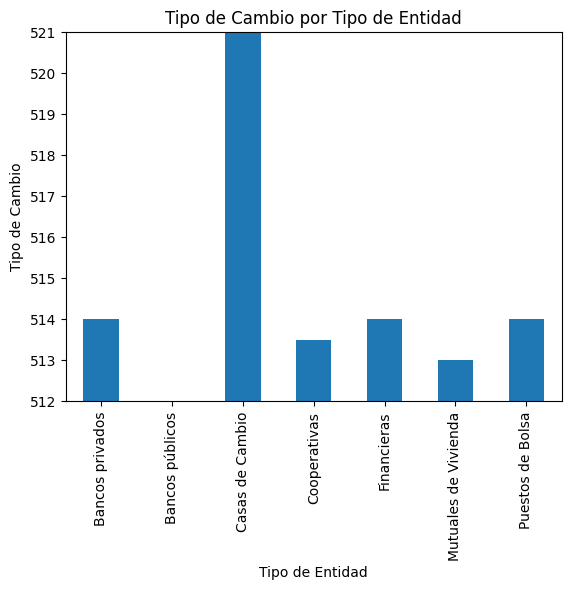

In [29]:
import matplotlib.pyplot as plt


minimo = df['Venta'].min()
maximo = df['Venta'].max()


#Graficar el tipo de cambio venta por tipo de entidad financiera
df.groupby('Tipo')['Venta'].mean().plot(kind='bar')
plt.title('Tipo de Cambio por Tipo de Entidad')
plt.xlabel('Tipo de Entidad')
plt.ylabel('Tipo de Cambio')


plt.ylim(minimo,maximo)
plt.show()

In [ ]:
df